In [1]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 836.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=5a40a40c2e9198668f06b323e58da0d3ea287c5785501d4383416c3551e75e84
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas_ta


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mutual-funds-and-etfs/ETFs.csv
/kaggle/input/mutual-funds-and-etfs/MutualFund prices - F-K.csv
/kaggle/input/mutual-funds-and-etfs/MutualFund prices - L-P.csv
/kaggle/input/mutual-funds-and-etfs/MutualFund prices - A-E.csv
/kaggle/input/mutual-funds-and-etfs/ETF prices.csv
/kaggle/input/mutual-funds-and-etfs/MutualFunds.csv
/kaggle/input/mutual-funds-and-etfs/MutualFund prices - Q-Z.csv


In [4]:
def main_information(df):
    print(f'The Dataset contains {df.shape[0]} rows and {df.shape[1]} columns')
    print(f"There are {len(list(df.select_dtypes(exclude='number').columns))} categorical columns and  {len(list(df.select_dtypes(include='number').columns))} numerical columns")
    print(f'There are {len(list(df.columns[df.isnull().any()]))} columns with missing values')
    print(f'The maximum number of missing values is {df.isnull().sum().max()} which is representing {round((df.isnull().sum().max() / df.shape[0]) * 100, 3)} percent of the column')

In [5]:
def fund_history(df, fund_symbol:str):
    fund_perf = df.loc[df.fund_symbol == fund_symbol]
    sns.lineplot(data=fund_perf, x="price_date", y="adj_close")
    plt.show()

In [6]:
def create_complete_df(df1:str, df2:str):
    data1=pd.read_csv(df1 + ".csv")
    data2=pd.read_csv(df2 + ".csv")
    data1["fund_symbol"] = data1["fund_symbol"].astype("str")
    data2["fund_symbol"] = data2["fund_symbol"].astype("str")
    full = data1.join(data2, on="fund_symbol")
    full.to_pickle("full_ETF")
    data1.fund_symbol.isnull().sum()

In [7]:
ETF_stock = pd.read_csv("/kaggle/input/mutual-funds-and-etfs/ETF prices.csv")
ETF_info = pd.read_csv("/kaggle/input/mutual-funds-and-etfs/ETFs.csv")
composition_col = ETF_info.iloc[:,34:45]
composition_col["fund_symbol"] = ETF_info.fund_symbol
composition_type = [i.split("fund_sector_")[1] for i in composition_col.columns[:-1]]
fund_perf = ETF_info.iloc[:, 121:]
fund_perf["fund_symbol"] = ETF_info.fund_symbol
perf_indicators = sorted(list(set(["_".join(i.split("fund_")[1].split("_")[:-1]) for i in fund_perf.columns[:-1]])))
perf_years = sorted(list(set([i.split("fund_")[1].split("_")[-1]for i in fund_perf.columns[:-1]])), key=lambda x: int(x.split("years")[0]))


In [8]:
def create_complete_df(df1:str, df2:str):
    data1=pd.read_csv(df1 + ".csv")
    data2=pd.read_csv(df2 + ".csv")
    data1["fund_symbol"] = data1["fund_symbol"].astype("str")
    data2["fund_symbol"] = data2["fund_symbol"].astype("str")
    full = data1.join(data2, on="fund_symbol")
    full.to_pickle("full_ETF")
    data1.fund_symbol.isnull().sum()

In [9]:
    def worlwide_description():
        df = ETF_info[["fund_family", "fund_category"]].dropna()
        df = df.groupby(["fund_family","fund_category"]).size().reset_index().rename(columns={0:'count'})
        fig = px.bar(df, x="fund_family", y="count", color="fund_category", text_auto=True)
        fig.show()

In [10]:
    def fund_performance(fund_code: str):
        df = fund_perf.loc[fund_perf.fund_symbol == fund_code]
        to_plot = pd.DataFrame(
            data=[
                [df[f"fund_{j}_{i}"].values[0] for j in perf_indicators] for i in perf_years
            ],
            index=perf_years,
            columns=perf_indicators
        ).reset_index().rename(columns={"index": "year"})

        fig = go.Figure(data=[go.Table(
            header=dict(values=list(to_plot.columns),
                        fill_color='paleturquoise',
                        align='center'),
            cells=dict(values=[to_plot[i] for i in to_plot.columns],
                       fill_color=['lavender']+["white"]*(len(to_plot.columns)-1),
                       align='center'))
        ])
        fig.update_layout(
            title="Plot Title"
        )

        fig.show()

In [11]:
    def fund_evolution(fund_code:str, kind:str):
        fund_perf = ETF_stock.loc[ETF_stock.fund_symbol == fund_code]
        insight_list = ["SMA30", "SMA60", "SMA90", "CMA30", "EWMA30"]
        fund_perf["SMA30"] = fund_perf['adj_close'].rolling(30).mean()
        fund_perf["SMA60"] = fund_perf['adj_close'].rolling(60).mean()
        fund_perf["SMA90"] = fund_perf['adj_close'].rolling(90).mean()
        fund_perf['CMA30'] = fund_perf['adj_close'].expanding().mean()
        fund_perf['EWMA30'] = fund_perf['adj_close'].ewm(span=30).mean()
        fund_perf.ta.macd(close='adj_close', fast=12, slow=26, signal=9, append=True)

        fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                            vertical_spacing=0.03, subplot_titles=('OHLC', 'Volume'),
                            row_width=[0.2, 0.7], specs=[[{"secondary_y": True}], [{"secondary_y": True}]])

        if kind == "candle":
            fig.add_trace(go.Candlestick(name='Closing Price',
                                         x=fund_perf['price_date'],
                                         open=fund_perf['open'],
                                         high=fund_perf['high'],
                                         low=fund_perf['low'],
                                         close=fund_perf['close']), row=1, col=1)
        else:
            fig.add_trace(go.Scatter(
                    name='Closing Price',
                    x=fund_perf['price_date'],
                    y=fund_perf['adj_close']
                ), row=1, col=1)

        for insight in insight_list:
            fig.add_trace(go.Scatter(
                name=insight,
                x=fund_perf["price_date"],
                y=fund_perf[insight]
            ), row=1, col=1)

        fig.add_trace(go.Scatter(
            name="MACD_12_26_9",
            x=fund_perf["price_date"],
            y=fund_perf["MACD_12_26_9"],
        ), row=1, col=1, secondary_y=True)
        fig.add_trace(go.Bar(x=fund_perf["price_date"], y=fund_perf['volume'], showlegend=False), row=2, col=1,secondary_y=False)
        fig.update(layout_xaxis_rangeslider_visible=False)
        fig.update_layout(
            yaxis_title='Wind speed (m/s)',
            title='Continuous, variable value error bars')
        fig.show()


In [12]:
main_information(ETF_info)
main_information(ETF_stock)


The Dataset contains 2310 rows and 142 columns
There are 17 categorical columns and  125 numerical columns
There are 129 columns with missing values
The maximum number of missing values is 2310 which is representing 100.0 percent of the column
The Dataset contains 3866030 rows and 8 columns
There are 2 categorical columns and  6 numerical columns
There are 0 columns with missing values
The maximum number of missing values is 0 which is representing 0.0 percent of the column


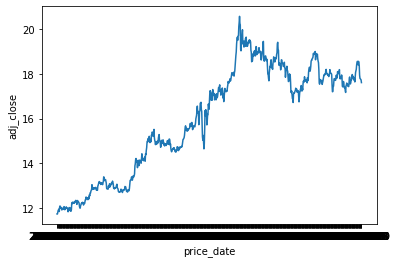

In [13]:
fund_history(ETF_stock, "AAAU")

In [14]:
worlwide_description()

In [15]:
fund_performance("AAAU")

In [16]:
fund_evolution("AAAU", "candle")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [17]:
fund_evolution("AAAU", "line")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st